# Kinetics Project Validation Tool
## This notebook can be used to validate a model against experimental data
The following is the isothermal reaction under investigation:
$\require{mhchem}$
$$\ce{A ->[C] D + U}$$

where A is the starting reagent, C is the catalyst, D is the desired product, and U is the undesired product.
We can control the starting concentration of A, the concentration of C, and the reaction temperature.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

## Use the following cell to import tab-separated experiment data

In [2]:
filename = "data/exp1420.tsv"
exp = pd.read_csv(filename, sep="\t|[ ]{1,}", engine='python', skiprows=2, names=['Time', 'A', 'D', 'U'])
init = pd.read_csv(filename, sep="\t|[ ]{1,}", engine='python', skiprows=1, names=['A', 'D', 'U', 'C', 'T'], nrows=1, usecols=range(2, 7))

## We propose the following mechanism
$\require{mhchem}$
$$\ce{A + C->[k_1] B + C}$$

$$\ce{A ->[k_2] U}$$

$$\ce{B <=>[{k_3}][{k_{-3}}] D}$$


A is the starting reagent, C is the catalyst, D is the desired product, and U is the undesired product.

## Use the cell below to enter a rate law. Define all necessary constants

In [4]:
def rate_law(cA0, cC0, T, time):
    """"
    This function is the proposed rate law.
    cA (mol/L) is the initial concentration of reactant A
    cC (mol/L) is the initial catalyst concentration
    T (K) is the temperature
    time (s) is the elapsed reaction time
    Return values:
    cA (mol/L) concentration of A at the given reaction time
    cD (mol/L) concentration of the desired product D at the given reaction time
    cU (mol/L) concentration of the undesired product U at the given reaction time
    """
    # rate "constants"
    k1 = 1.          # units of k1
    k2 = 3.2         # units of k2
    k3 = 0.25 * T**2 # units of k3
    k_3 = 0.5        # units of k_{-3}
        
    cA = cA0 * time * k1
    cD = cA0 * time * 2. * k2
    cU = cA0 * time * 0.5 * k2 / k3
    return cA, cD, cU

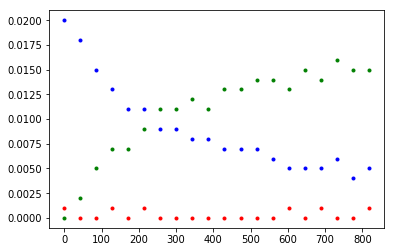

In [5]:
pl.plot(exp.Time.values[:-1], exp.A.values[:-1], 'b.',
       exp.Time.values[:-1], exp.D.values[:-1], 'g.',
       exp.Time.values[:-1], exp.U.values[:-1], 'r.')

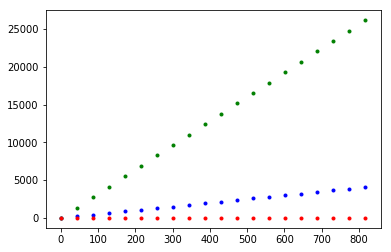

In [6]:
A, D, U = rate_law(5., 0.2, 298, exp.Time.values)
pl.plot(exp.Time.values[:-1], A[:-1], 'b.',
       exp.Time.values[:-1], D[:-1], 'g.',
       exp.Time.values[:-1], U[:-1], 'r.')